# Stochastic block model

The stochastic block model is a random graph model where all vertices are assigned a group. Edges are place between two vertices independently from the placement of other edges. The probability that an edge is placed between two given vertices depends only on the groups they have been assigned to. This random graph model is often used to mimic social where people are subdivided into groups where there is a lot of communication within people of each group, but not much between people from different groups.

Mathematically , the model is defined through a vector $\vec{n} = (n_1, n_2, \ldots, n_r)$ and a matrix $$P = \begin{pmatrix}
p_{11} & \cdots & p_{1r} \\
   \vdots & \ddots & \vdots \\
   p_{r1} & \cdots & p_{rr}
\end{pmatrix}.$$
Here, $r$ is the number of groups, the value of $n_k$ for fixed $k \in \{1, 2, \ldots, r\}$ tells you how many vertices are present in group $k$. Finally, the value of $p_{kl}$ for fixed $k, l \in \{1, 2, \ldots, r\}$ tells you the probability that an edge is placed between a vertex of group $k$ and $l$. Since the output graph is undirected, we need to have that $p_{kl} = p_{lk}$.

Algorithmically, we can create an instance of the stochastic block model by first generating an array $V = \{1, 2, \ldots, n_1 + n_2 + \ldots + n_r\}$ of vertices and an array $T$ of vertex groups. Element $T_i$ in the array $T$ will contain the group of vertex $i \in V$. For simplicity, you can often let $T$ be given by $$T = \{\underbrace{1, 1, \ldots, 1}_{n_1 \text{ times}}, \underbrace{2, 2, \ldots, 2}_{n_2 \text{ times}}, \ldots, \underbrace{r, r, \ldots, r}_{n_r \text{ times}}\}.$$ After defining $V$ and $T$, we loop through all vertices $i, j \in V$ such that $i \neq j$ and check their groups. Suppose that the group of vertex $i$ is $k$ and the group of vertex $j$ is $l$. Then, we add the edge $\{i, j\}$ to the edge list $E$ with probability $p_{kl}$. After we have looped over all pairs of vertices, then we have found a realisation of the stochastic block model.

**Exercise 1.** Create a function ``SBM(n, P)`` that inputs the vector $\vec{n}$ and matrix $P$ and outputs an instance of the stochastic block model. Make sure it outputs the vertex list $V$, the group list $T$ and the edge list $E$. 

In [2]:
import numpy as np

def SBM(n, P):
    V = []
    T = []
    E = []
    #Your solution goes here
    
    # Calculating V:
    v_range = sum(n)
    V = np.array([val for val in range(1,v_range+1)])
    # Calculating T:
    for n_value,group in zip(n,range(1,len(n)+1)): 
        T.extend([group]*n_value)
    # Calculating E:
    for i in range(v_range):
        for j in range(v_range):
            if i!= j:
                k,l = T[i],T[j]
                p = P[i][j]
                edge = tuple(i,j,p)
                E.append(edge)

    return V, E, T

## The stochastic block model in NetworkX

In NetworkX the stochastic block model can be generated using the function ``stochastic_block_model``. It inputs the vector $\vec{n}$ and the matrix $P$ as lists (or ``np.array`` objects). Below you see some example code where NetworkX is used to generate an instance of the stochastic block model with three groups.

In [3]:
import networkx as nx

#Generate the instance of SBM
n = [50, 30, 10]
P = [[0.5, 0.1, 0.02], [0.1, 0.7, 0.1], [0.02, 0.1, 0.3]]
G = nx.stochastic_block_model(n, P)

#Extract the vertex list, edge list, and the group allocation
V = np.array(G.nodes)
E = np.array(G.edges)
T = np.zeros_like(V)
for group, partition in enumerate(np.array(G.graph['partition'])):
    T[np.array(list(partition))] = group

**Exercise 2.** By default, the function ``stochastic_block_model`` will always assign vertex $1$ through $n_1$ to group $1$, vertex $n_1 + 1$ through $n_1 + n_2$ to group $2$ et cetera. Sometimes, though, you might want to specificy the groups beforehand. Create an implementation of the stochastic block model using NetworkX where you input the vertex-group array $T$ and the probability matrix $P$, but not the vector $\vec{n}$.

In [4]:
from collections import Counter
#Your answer goes here
def sbm_with_node_groups(T,P):
    group_vals= Counter(T)
    n= list(group_vals.values())
    G = nx.stochastic_block_model(sizes=n,p=P,nodelist=T)
    return G


Like in the Erdős–Rényi model, the implementation of ``stochastic_block_model`` in NetworkX might be relatively slow when the probabilities $p_{kl}$ in the matrix $P$ satisfy $$p_{kl} \approx \frac{C_{kl}}{n_1 + n_2 + \ldots + n_r},$$ for some fixed constant $C_{kl} > 0$ for all groups $k$ and $l$. To solve this issue, the NetworkX implementation of ``stochastic_block_model`` has an optional parameter ``sparse`` that changes the generation algorithm of the stochastic block model. Its default value is "true" which results in a faster algorithm when the probabilities $p_{kl}$ are small compared to $n_1 + n_2 + \ldots + n_r$, but a slower algorithm when these values are big. 

**Exercise 3.** Compare the NetworkX implementation of the stochastic block model for increasing values of $n$ with the following two probability matrices: $$P_1 = \begin{pmatrix}0.3 & 0.6 \\0.6 & 0.4 \end{pmatrix}, \qquad \text{and} \qquad P_2 = \begin{pmatrix}0.15 / n & 0.3/n \\0.3/n & 0.2/n \end{pmatrix}. $$ Take $n_1 = n_2 = n/2$ (rounding the values up or down if needed), and consider both the option ``sparse`` to be true, and ``sparse`` to be false. For each value of $n$ you consider, measure the average time the code takes to run over multiple realisations of the model. Then, plot these times on a log-log scale for all probability matrices and ``sparse``-option settings. What do you see?

Calculating P1
Calculating P2


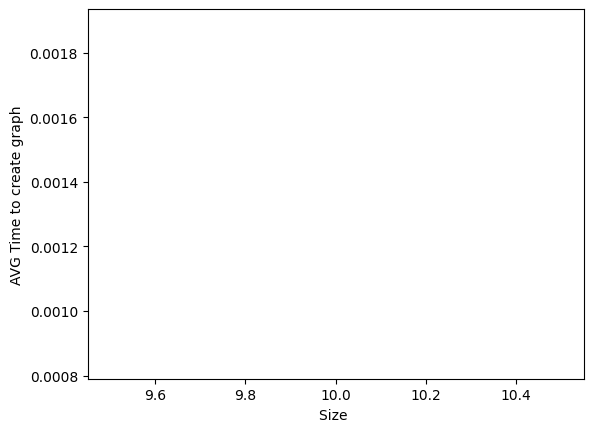

In [5]:
import time 
import matplotlib.pyplot as plt  
import networkx as nx 
n_iterations = list(range(1,2))
tests_for_iteration = 2
P1 = [[0.3,0.6],[0.6,0.4]]
P2 = [[0.15,0.3],[0.3,0.2]]

def calculate_avg_time(P,n_iterations,tests_for_iteration):
    n = 10
    plot_times, plot_times_sparse = [],[]
    for _ in n_iterations:
        n *=10
        with_sparse = []                                                   
        without_sparse = []                                            
        for _ in range(tests_for_iteration):                               
            start_time = time.time()                                       
            G = nx.stochastic_block_model(sizes=[int(n/2),int(n/2)],p=P,sparse=False) 
            without_sparse.append(time.time() - start_time)                
        for _ in range(tests_for_iteration):                               
            start_time = time.time()                                       
            G = nx.stochastic_block_model(sizes=[int(n/2),int(n/2)],p=P,sparse=True)  
            with_sparse.append(time.time() - start_time)                   
        plot_times.append(sum(without_sparse)/len(without_sparse))         
        plot_times_sparse.append(sum(with_sparse)/len(with_sparse))        
    return plot_times,plot_times_sparse

print("Calculating P1")
plot_times1,plot_times_sparse1 = calculate_avg_time(P1,n_iterations,tests_for_iteration)
print("Calculating P2")
plot_times2,plot_times_sparse2 = calculate_avg_time(P2,n_iterations,tests_for_iteration)

def plot_sbm(times,n_iterations):
    n_x_axys = []
    n = 10  
    for _ in n_iterations:
        n = 10  
        n_x_axys.append(n)
    plt.plot(n_x_axys,times)
    plt.ylabel("AVG Time to create graph")
    plt.xlabel("Size ")
    plt.show

plot_sbm(plot_times1,n_iterations)
plot_sbm(plot_times_sparse1,n_iterations)
plot_sbm(plot_times2,n_iterations)
plot_sbm(plot_times_sparse2,n_iterations)